In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.mlab as mlab
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [2]:
file_path = r"amazon.xlsx"
df = pd.read_excel(file_path, index_col = 'date', parse_dates = True)
close = df[['4. close']]
close

,4. close
date,
2020-05-05,2317.80
2020-05-06,2351.26
2020-05-07,2367.61
2020-05-08,2379.61
2020-05-11,2409.00
...,...
2020-09-18,2954.91
2020-09-21,2960.47
2020-09-22,3128.99


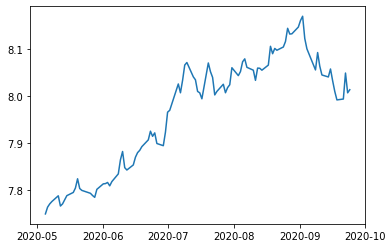

In [3]:
lnclose = np.log(close)
lnclose
plt.plot(lnclose)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


<Figure size 4320x720 with 0 Axes>

<Figure size 4320x720 with 0 Axes>

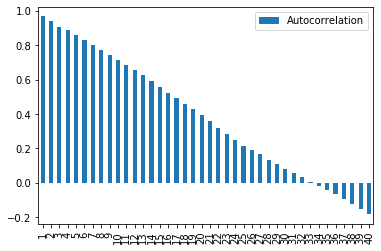

In [4]:
plt.figure(figsize = (60,10))
a = acf(lnclose)[1:100]
test_df = pd.DataFrame([a]).T

test_df.columns = ['Autocorrelation']
plt.figure(figsize = (60,10))
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

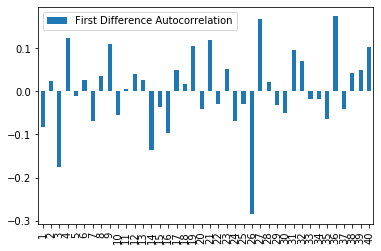

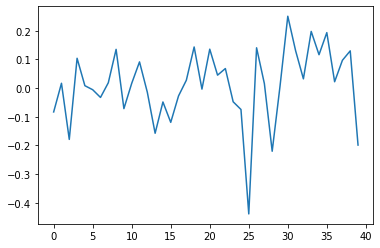

In [5]:
result = ts.adfuller(lnclose, 1)
result
lnclose_diff = lnclose-lnclose.shift()
diff = lnclose_diff.dropna()
a_diff = acf(diff)[1:100]
test_df = pd.DataFrame([a_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
p_diff = pacf(diff)[1:100]
plt.figure()
plt.plot(p_diff)
plt.show()

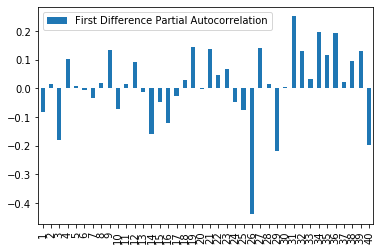

In [6]:
test_df = pd.DataFrame([p_diff]).T
test_df.columns = ['First Difference Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

predicted=3026.880808
predicted=3033.971616
predicted=3041.062424
predicted=3048.153232
predicted=3055.244040
predicted=3062.334848
predicted=3069.425657
predicted=3076.516465
predicted=3083.607273
predicted=3090.698081


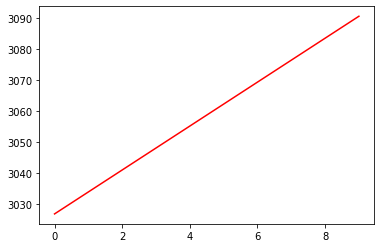

In [7]:
X = close.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.plot(predictions, color='red')
plt.show()

predicted=3026.880808
predicted=3033.971616
predicted=3041.062424
predicted=3048.153232
predicted=3055.244040
predicted=3062.334848
predicted=3069.425657
predicted=3076.516465
predicted=3083.607273
predicted=3090.698081


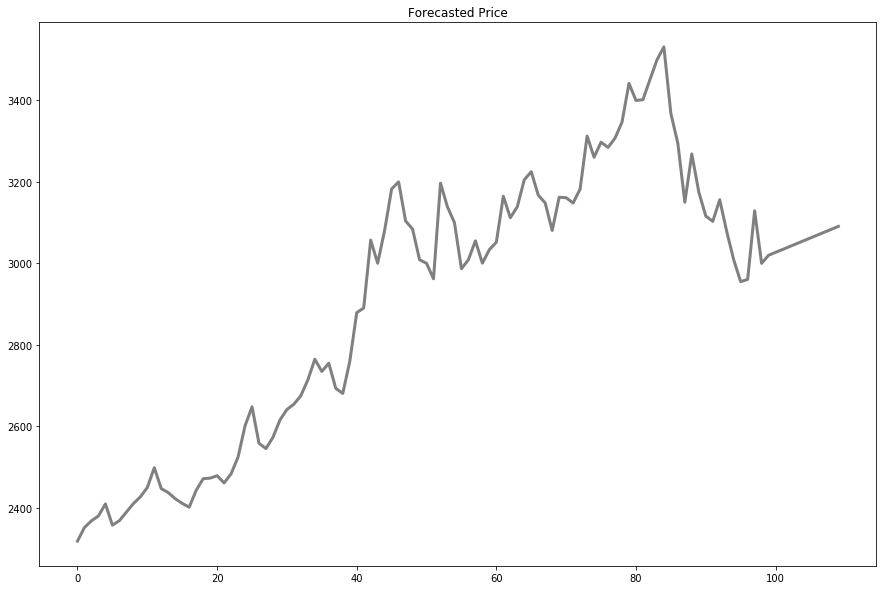

In [8]:
X = close.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'grey', lw = 3)
plt.title('Forecasted Price')
plt.show()

In [9]:
# open
opening = df[['1. open']]
# high
high = df[['2. high']]
# low
low = df[['3. low']]

predicted=2984.232323
predicted=2990.674646
predicted=2997.116970
predicted=3003.559293
predicted=3010.001616
predicted=3016.443939
predicted=3022.886263
predicted=3029.328586
predicted=3035.770909
predicted=3042.213232


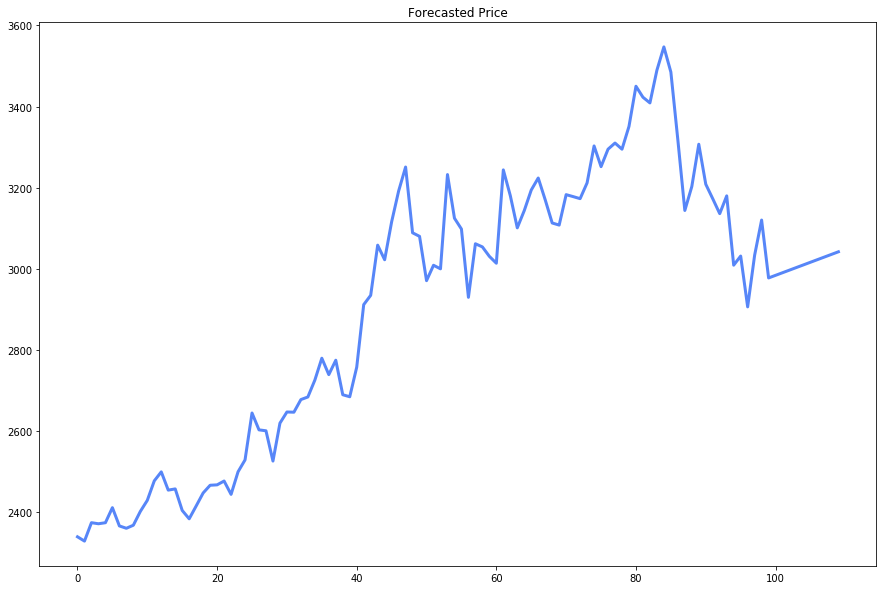

In [10]:
X = opening.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = '#5786f8', lw = 3)
plt.title('Forecasted Price')
plt.show()

predicted=3076.555556
predicted=3083.811111
predicted=3091.066667
predicted=3098.322222
predicted=3105.577778
predicted=3112.833333
predicted=3120.088889
predicted=3127.344444
predicted=3134.600000
predicted=3141.855556


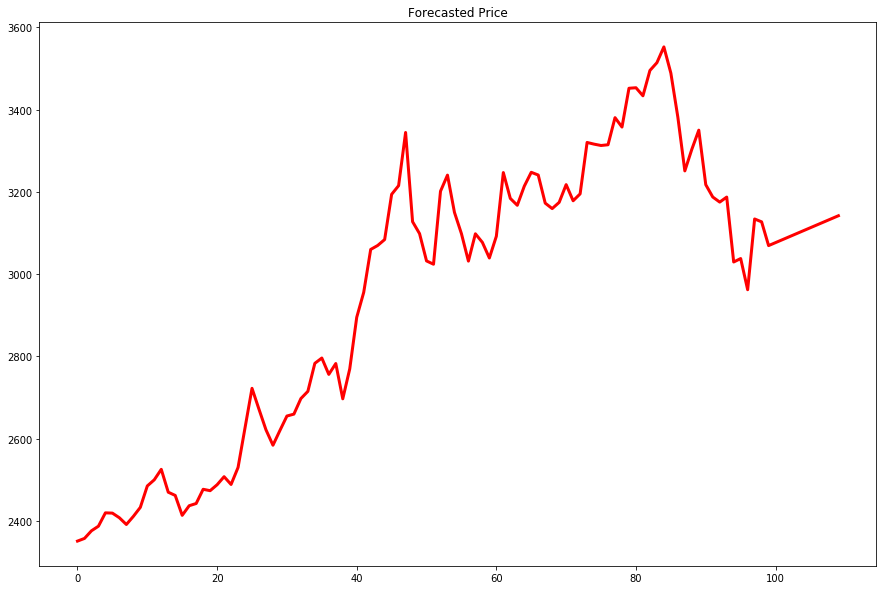

In [11]:
X = high.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'r', lw = 3)
plt.title('Forecasted Price')
plt.show()

predicted=2971.645152
predicted=2978.290303
predicted=2984.935455
predicted=2991.580606
predicted=2998.225758
predicted=3004.870909
predicted=3011.516061
predicted=3018.161212
predicted=3024.806364
predicted=3031.451515


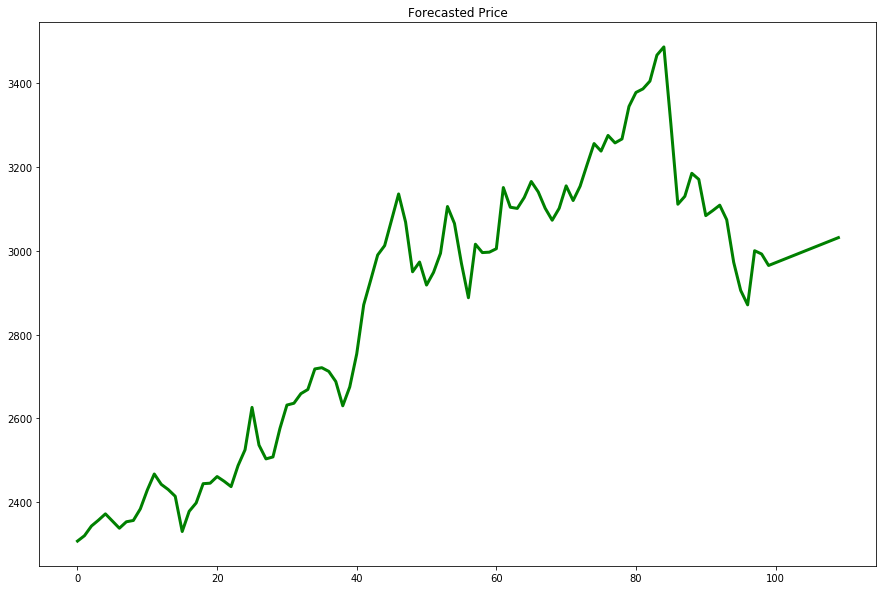

In [12]:
X = low.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.figure(figsize = (15,10))
plt.plot(history, color = 'g', lw = 3)
plt.title('Forecasted Price')
plt.show()